csvs needed for this section: https://drive.google.com/drive/folders/10WslU2x5JEiG2IQEn9KvMxSbzrERCdZB?usp=sharing

df = the only dataframe you need, with temp, state, year etc

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
# Read gas emissions data
file1 = open('climatewatch-usemissions.csv', 'r') 
emissionsDf = pd.read_csv(file1)  # used to combine all states and years
emissionsDf = emissionsDf.drop(range(0,3))
emissionsDf.columns = ["State", "Year", "GHG Emissions Excluding LUCF",	'GHG Emissions Including LUCF',	'CO2 (excluding LUCF)',	'CH4',	'N2O',	'F-Gas',	'Energy',	'Industrial Processes',	'Agriculture',	'Waste',	'Land Use and Forestry',	'Bunker Fuels',	'Electric Power',	'Commercial',	'Residential',	'Industrial',	'Transportation',	'Fugitive Emissions',	'State GDP (Million US$ (chained 1997/2005))',	'Population',	'Energy Use (Thous. tonnes oil eq. (ktoe))']
# remove rows of Hawaii Data
emissionsDf = emissionsDf[emissionsDf.State != 'Hawaii']
tempDf = pd.DataFrame(emissionsDf)      # used to split state wise

In [ ]:
# process combined emissions data
# emissionsDf = emissionsDf.drop(range(0,3))
# emissionsDf.columns = ["State", "Year", "GHG Emissions Excluding LUCF",	'GHG Emissions Including LUCF',	'CO2 (excluding LUCF)',	'CH4',	'N2O',	'F-Gas',	'Energy',	'Industrial Processes',	'Agriculture',	'Waste',	'Land Use and Forestry',	'Bunker Fuels',	'Electric Power',	'Commercial',	'Residential',	'Industrial',	'Transportation',	'Fugitive Emissions',	'State GDP (Million US$ (chained 1997/2005))',	'Population',	'Energy Use (Thous. tonnes oil eq. (ktoe))']
# drop the State and Year
emissionsDf = emissionsDf.drop(columns=['State', 'Year'])
# change str values to float
emissionsDf = emissionsDf.astype(float)

# weigh the features by population
emissionsDf.iloc[:,0:18] = emissionsDf.iloc[:,0:18].div(emissionsDf.Population, axis=0)
emissionsDf.iloc[:,20] = emissionsDf.iloc[:,20].div(emissionsDf.Population, axis=0)

In [ ]:
emissionsDf.shape

(1479, 21)

In [ ]:
emissionsDf.head(5)

,GHG Emissions Excluding LUCF,GHG Emissions Including LUCF,CO2 (excluding LUCF),CH4,N2O,F-Gas,Energy,Industrial Processes,Agriculture,Waste,Land Use and Forestry,Bunker Fuels,Electric Power,Commercial,Residential,Industrial,Transportation,Fugitive Emissions,State GDP (Million US$ (chained 1997/2005)),Population,Energy Use (Thous. tonnes oil eq. (ktoe))
3,0.000035,0.000020,0.000028,0.000006,1.489889e-06,1.272142e-07,0.000032,8.500820e-07,1.839858e-06,8.989998e-07,-1.500507e-05,0.0,0.000012,6.062525e-07,7.983087e-07,0.000006,0.000007,4.093762e-06,83766.0,4050055.0,0.010363
4,0.000086,0.000081,0.000065,0.000020,5.033216e-07,6.653903e-08,0.000083,1.976349e-06,1.168218e-07,6.663707e-07,-4.406813e-06,0.0,0.000005,3.995095e-06,2.914877e-06,0.000029,0.000022,2.038675e-05,28772.0,553290.0,0.026602
5,0.000019,0.000018,0.000017,0.000001,9.446957e-07,2.242201e-07,0.000018,3.137621e-07,1.206492e-06,4.183521e-07,-9.878821e-07,0.0,0.000009,5.198594e-07,5.162364e-07,0.000001,0.000007,2.607448e-08,81606.0,3684097.0,0.006423
6,0.000031,0.000011,0.000022,0.000004,4.227785e-06,1.000345e-07,0.000023,4.885694e-07,6.763115e-06,7.539493e-07,-2.003752e-05,0.0,0.000009,6.918771e-07,1.085928e-06,0.000004,0.000007,3.604424e-07,44496.0,2356586.0,0.009153
7,0.000014,0.000012,0.000012,0.000001,7.877420e-07,8.534919e-08,0.000013,2.580579e-07,9.674698e-07,4.804590e-07,-2.250875e-06,0.0,0.000001,6.375796e-07,1.007667e-06,0.000002,0.000007,1.823187e-07,906103.0,29959515.0,0.006262


In [ ]:
# weigh the features by state population
intDf = tempDf.iloc[:, 2:20].astype(float)
tempRow = tempDf.iloc[:, 22].astype(float)
tempCols = tempDf.iloc[:, 21].astype(float)
tempDf.iloc[:, 2:20] = intDf.div(tempCols, axis = 0)
tempDf.iloc[:,22] = tempRow.div(tempCols, axis = 0) 
tempDf.head(5)

,State,Year,GHG Emissions Excluding LUCF,GHG Emissions Including LUCF,CO2 (excluding LUCF),CH4,N2O,F-Gas,Energy,Industrial Processes,Agriculture,Waste,Land Use and Forestry,Bunker Fuels,Electric Power,Commercial,Residential,Industrial,Transportation,Fugitive Emissions,State GDP (Million US$ (chained 1997/2005)),Population,Energy Use (Thous. tonnes oil eq. (ktoe))
3,Alabama,1990,3.51643e-05,2.01592e-05,2.76927e-05,5.85443e-06,1.48989e-06,1.27214e-07,3.15753e-05,8.50082e-07,1.83986e-06,8.99e-07,-1.50051e-05,0,1.24888e-05,6.06253e-07,7.98309e-07,6.28396e-06,7.30428e-06,4.09376e-06,83766,4050055,0.010363
4,Alaska,1990,8.56597e-05,8.12529e-05,6.48737e-05,2.02161e-05,5.03322e-07,6.6539e-08,8.29001e-05,1.97635e-06,1.16822e-07,6.66371e-07,-4.40681e-06,0,4.72262e-06,3.99509e-06,2.91488e-06,2.86488e-05,2.2232e-05,2.03868e-05,28772,553290,0.026602
5,Arizona,1990,1.94587e-05,1.84709e-05,1.71796e-05,1.11021e-06,9.44696e-07,2.2422e-07,1.75201e-05,3.13762e-07,1.20649e-06,4.18352e-07,-9.87882e-07,0,8.87071e-06,5.19859e-07,5.16236e-07,1.05516e-06,6.53209e-06,2.60745e-08,81606,3684097,0.006423
6,Arkansas,1990,3.05415e-05,1.05039e-05,2.21555e-05,4.05813e-06,4.22778e-06,1.00035e-07,2.25358e-05,4.88569e-07,6.76311e-06,7.53949e-07,-2.00375e-05,0,9.20734e-06,6.91877e-07,1.08593e-06,4.02638e-06,7.16386e-06,3.60442e-07,44496,2356586,0.009153
7,California,1990,1.43748e-05,1.21239e-05,1.23072e-05,1.19446e-06,7.87742e-07,8.53492e-08,1.26688e-05,2.58058e-07,9.6747e-07,4.80459e-07,-2.25087e-06,0,1.34661e-06,6.3758e-07,1.00767e-06,2.39928e-06,7.0953e-06,1.82319e-07,906103,29959515,0.006262


Playground

In [ ]:
# Read 50 state data files, convert to DataFrames.

# Alabama1
file1 = open('tempByStateAlabama.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create alabama subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Alabama'])
# merge into one dataframe
df = pd.DataFrame(pd.merge(df2, df1, on = ['Year'], how='left'))

# Alaska2
file1 = open('tempByStateAlaska.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Alaska subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Alaska'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Arizona3
file1 = open('tempByStateArizona.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Arizona subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Arizona'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Arkansas4
file1 = open('tempByStateArkansas.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Arkansas subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Arkansas'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# California5
file1 = open('tempByStateCalifornia.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create California subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'California'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Colorado6
file1 = open('tempByStateColorado.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Colorado subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Colorado'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Connecticut7
file1 = open('tempByStateConnecticut.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Connecticut subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Connecticut'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Delaware8
file1 = open('tempByStateDelaware.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Delaware subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Delaware'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Florida9
file1 = open('tempByStateFlorida.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Florida subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Florida'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Georgia10
file1 = open('tempByStateGeorgia.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Georgia subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Georgia'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Idaho11
file1 = open('tempByStateIdaho.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Idaho subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Idaho'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Illinois12
file1 = open('tempByStateIllinois.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Illinois subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Illinois'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Indiana13
file1 = open('tempByStateIndiana.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Indiana subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Indiana'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Iowa14
file1 = open('tempByStateIowa.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Iowa subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Iowa'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Kansas15
file1 = open('tempByStateKansas.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Kansas subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Kansas'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)


# Kentucky16
file1 = open('tempByStateKentucky.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Kentucky subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Kentucky'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Louisiana17
file1 = open('tempByStateLouisiana.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Louisiana subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Louisiana'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Maine18
file1 = open('tempByStateMaine.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Maine subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Maine'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Maryland19
file1 = open('tempByStateMaryland.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Maryland subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Maryland'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Massachusetts20
file1 = open('tempByStateMassachusetts.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Massachusetts subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Massachusetts'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Michigan21
file1 = open('tempByStateMichigan.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Michigan subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Michigan'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Minnesota22
file1 = open('tempByStateMinnesota.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Minnesota subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Minnesota'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Mississippi23
file1 = open('tempByStateMississippi.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Mississippi subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Mississippi'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Missouri24
file1 = open('tempByStateMissouri.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Missouri subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Missouri'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Montana25
file1 = open('tempByStateMontana.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Montana subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Montana'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Nebraska26
file1 = open('tempByStateNebraska.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Nebraska subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Nebraska'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Nevada27
file1 = open('tempByStateNevada.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Nevada subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Nevada'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# NewHampshire28
file1 = open('tempByStateNewHampshire.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create NewHampshire subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'NewHampshire'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# NewJersey29
file1 = open('tempByStateNewJersey.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create NewJersey subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'NewJersey'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# NewMexico30
file1 = open('tempByStateNewMexico.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create NewMexico subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'NewMexico'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# NewYork31
file1 = open('tempByStateNewYork.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create NewYork subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'NewYork'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# NorthCarolina32
file1 = open('tempByStateNorthCarolina.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create NorthCarolina subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'NorthCarolina'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# NorthDakota33
file1 = open('tempByStateNorthDakota.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create NorthDakota subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'NorthDakota'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Ohio34
file1 = open('tempByStateOhio.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Ohio subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Ohio'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Oklahoma35
file1 = open('tempByStateOklahoma.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Oklahoma subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Oklahoma'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Oregon36
file1 = open('tempByStateOregon.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Oregon subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Oregon'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Pennsylvania37
file1 = open('tempByStatePennsylvania.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Pennsylvania subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Pennsylvania'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# RhodeIsland38
file1 = open('tempByStateRhodeIsland.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create RhodeIsland subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'RhodeIsland'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# SouthCarolina39
file1 = open('tempByStateSouthCarolina.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create SouthCarolina subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'SouthCarolina'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# SouthDakota40
file1 = open('tempByStateSouthDakota.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create SouthDakota subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'SouthDakota'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Tennessee41
file1 = open('tempByStateTennessee.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Tennessee subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Tennessee'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Texas42
file1 = open('tempByStateTexas.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Texas subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Texas'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Utah43
file1 = open('tempByStateUtah.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Utah subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Utah'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Vermont44
file1 = open('tempByStateVermont.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Vermont subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Vermont'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Virginia45
file1 = open('tempByStateVirginia.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Virginia subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Virginia'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Washington46
file1 = open('tempByStateWashington.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Washington subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Washington'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# WestVirginia47
file1 = open('tempByStateWestVirginia.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create WestVirginia subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'WestVirginia'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Wisconsin48
file1 = open('tempByStateWisconsin.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Wisconsin subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Wisconsin'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

# Wyoming49
file1 = open('tempByStateWyoming.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Wyoming subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Wyoming'])
# merge into one dataframe
df = df.append(pd.merge(df2, df1, on = ['Year'], how='left'), ignore_index=True)

Split to form train/test sets

In [ ]:
# y values (avg temp)
yDf = df['Avg Temp'].astype(float)
colsToDrop = ['State', 'Year', 'Avg Temp', 'Delta']
# x values (emissions data)
xDf = df.drop(columns=colsToDrop).astype(float)

In [ ]:
# use a 80/20 split to divide into train/test sets
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(xDf, yDf, test_size = 0.2, random_state=42)

# Feature Selection using Recursive Feature Elimination with Cross Validation

Linear Regression

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# find the best features to use with Linear Regression model
cv_estimator1 = LinearRegression()
cv_estimator1.fit(xTrain, yTrain)
cv_selector1 = RFECV(cv_estimator1, cv= 5, step=1)
cv_selector1 = cv_selector1.fit(xTrain, yTrain)
rfecv_mask1 = cv_selector1.get_support()

rfecv_features1 = [] 

for bool, feature in zip(rfecv_mask1, xTrain.columns):
 if bool:
  rfecv_features1.append(feature)

print('Optimal number of features :', cv_selector1.n_features_)
print('Best features :', rfecv_features1)

xTrainLinReg = xTrain[rfecv_features1]
xTestLinReg = xTest[rfecv_features1]

Optimal number of features : 20
Best features : ['GHG Emissions Excluding LUCF', 'GHG Emissions Including LUCF', 'CO2 (excluding LUCF)', 'CH4', 'N2O', 'F-Gas', 'Energy', 'Industrial Processes', 'Agriculture', 'Waste', 'Land Use and Forestry', 'Bunker Fuels', 'Electric Power', 'Commercial', 'Residential', 'Industrial', 'Transportation', 'Fugitive Emissions', 'State GDP (Million US$ (chained 1997/2005))', 'Energy Use (Thous. tonnes oil eq. (ktoe))']


In [ ]:
yTrain

12      63.6
381     47.5
717     41.6
497     40.4
964     48.2
        ... 
121     58.9
1044    47.3
1095    47.4
860     47.3
1126    42.1
Name: Avg Temp, Length: 904, dtype: float64

Random Forest

In [ ]:
# tune hyperparameters
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state = 42)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 5 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(xTrain, yTrain)

In [ ]:
# rf_random.best_params_ 

In [ ]:
# hard code the best hyperparameters because RandomizedSearchCV takes 41 minutes to run
rf_random_best_params_ = {'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [ ]:
# evaluate 
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
# accuracy of baseline Random Forest Model with no hyperparameter tuning
base_model = RandomForestRegressor()
base_model.fit(xTrain, yTrain)
base_accuracy = evaluate(base_model, xTest, yTest)

Model Performance
Average Error: 1.2431 degrees.
Accuracy = 97.49%.


In [ ]:
# accuracy after hyperparameter tuning
# best_random = rf_random.best_estimator_
# random_accuracy = evaluate(best_random, xTest, yTest)

In [ ]:
# print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Random Forest Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# find the best features to use with Random Forest model
cv_estimator2 = RandomForestRegressor(bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=400)
cv_estimator2.fit(xTrain, yTrain)
cv_selector2 = RFECV(cv_estimator2, cv= 5, step=1)
cv_selector2 = cv_selector2.fit(xTrain, yTrain)
rfecv_mask2 = cv_selector2.get_support()

rfecv_features2 = [] 

for bool, feature in zip(rfecv_mask2, xTrain.columns):
 if bool:
  rfecv_features2.append(feature)

print('Optimal number of features :', cv_selector2.n_features_)
print('Best features :', rfecv_features2)

xTrainRandFor = xTrain[rfecv_features2]
xTestRandFor = xTest[rfecv_features2]

Optimal number of features : 21
Best features : ['GHG Emissions Excluding LUCF', 'GHG Emissions Including LUCF', 'CO2 (excluding LUCF)', 'CH4', 'N2O', 'F-Gas', 'Energy', 'Industrial Processes', 'Agriculture', 'Waste', 'Land Use and Forestry', 'Bunker Fuels', 'Electric Power', 'Commercial', 'Residential', 'Industrial', 'Transportation', 'Fugitive Emissions', 'State GDP (Million US$ (chained 1997/2005))', 'Population', 'Energy Use (Thous. tonnes oil eq. (ktoe))']


Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVR
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

# find the best features to use with SVM model
cv_estimator3 = LinearSVR(max_iter = 10000)
cv_estimator3.fit(xTrain, yTrain)
cv_selector3 = RFECV(cv_estimator3, cv= 5, step=1)
cv_selector3 = cv_selector3.fit(xTrain, yTrain)
rfecv_mask3 = cv_selector3.get_support()

rfecv_features3 = [] 

for bool, feature in zip(rfecv_mask3, xTrain.columns):
 if bool:
  rfecv_features3.append(feature)

print('Optimal number of features :', cv_selector3.n_features_)
print('Best features :', rfecv_features3)

xTrainSVM = xTrain[rfecv_features3]
xTestSVM = xTest[rfecv_features3]

Optimal number of features : 12
Best features : ['GHG Emissions Excluding LUCF', 'GHG Emissions Including LUCF', 'CO2 (excluding LUCF)', 'CH4', 'Energy', 'Land Use and Forestry', 'Electric Power', 'Industrial', 'Fugitive Emissions', 'State GDP (Million US$ (chained 1997/2005))', 'Population', 'Energy Use (Thous. tonnes oil eq. (ktoe))']


# Evaluation

Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error
model1 = LinearRegression()
model1.fit(xTrainLinReg, yTrain)
y_pred1 = model1.predict(xTestLinReg)
# check accuracy score
print(model1.score(xTestLinReg, yTest))
print(mean_squared_error(yTest, y_pred1))

0.7868492519840581
15.348011586413955


In [ ]:
evaluate1 = pd.DataFrame({'Actual': yTest.values.flatten(), 'Predicted': y_pred1.flatten()})
evaluate1.head(10)

,Actual,Predicted
0,52.7,54.483823
1,49.8,49.210216
2,53.7,52.343490
3,65.6,63.828038
4,49.3,46.619420
5,63.6,57.842156
6,56.6,60.087353
7,29.3,35.189932
8,43.2,41.776251
9,59.7,59.712482


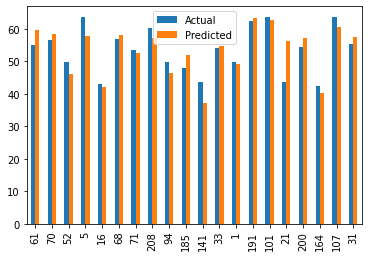

In [ ]:
evaluate1.sample(20).plot(kind = 'bar')


Random Forest

In [ ]:
model2 = RandomForestRegressor(bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=400)
model2.fit(xTrainRandFor, yTrain)
# check accuracy score
model2.score(xTestRandFor, yTest)

0.9703518572401316

In [ ]:
y_pred2=model2.predict(xTestRandFor)
print(mean_squared_error(yTest, y_pred2))
evaluate2 = pd.DataFrame({'Actual': yTest.values.flatten(), 'Predicted': y_pred2.flatten()})
evaluate2.head(10)

2.1348273127340014


,Actual,Predicted
0,52.7,51.921388
1,49.8,49.923796
2,53.7,55.034138
3,65.6,66.274478
4,49.3,48.915500
5,63.6,61.532853
6,56.6,54.201089
7,29.3,31.698250
8,43.2,42.277250
9,59.7,59.628888


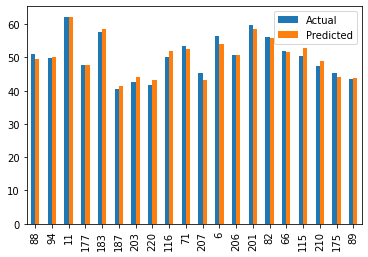

In [ ]:
evaluate2.sample(20).plot(kind = 'bar')

SVM

In [ ]:
model3 = LinearSVR()
model3.fit(xTrainSVM, yTrain)
# check accuracy score
model3.score(xTestSVM, yTest)

-143.60975570201342

In [ ]:
y_pred3=model3.predict(xTestSVM)
print(mean_squared_error(yTest, y_pred3))
evaluate3 = pd.DataFrame({'Actual': yTest.values.flatten(), 'Predicted': y_pred3.flatten()})
evaluate3.head(10)

10412.68785909677


,Actual,Predicted
0,52.7,119.966653
1,49.8,203.132323
2,53.7,32.911208
3,65.6,47.668463
4,49.3,25.813571
5,63.6,38.162671
6,56.6,55.977529
7,29.3,13.585816
8,43.2,7.102151
9,59.7,35.044736


In [ ]:
evaluate3.head(10).plot(kind = 'bar')